# Задание 1 по дисциплине SWOT-анализ

# Информация об исполнителе

In [ ]:
print ("Исполнитель:")
print ("Группа: 20БИ-3")
print ("ФИО: Гуменюк Олеся Евгеньевна")
!ln -fs /usr/share/zoneinfo/Europe/Moscow /etc/localtime
!date

Исполнитель:
Группа: 20БИ-3
ФИО: Гуменюк Олеся Евгеньевна
Wed Mar  3 17:25:23 MSK 2021


# Cвязь и обмен данными с Google-диском, содержание папок со   всеми используемыми ресурсами

In [182]:
from google.colab import auth
auth.authenticate_user()
!pip install --upgrade gspread
import gspread
from google.colab import drive
drive.mount('/content/drive')
import os
print(os.getcwd())
print(os.listdir('./'))
print(os.listdir('/content/drive'))
print(os.listdir('/content/drive/MyDrive/Colab Notebooks/task1'))
%ll -lF /content/drive/MyDrive/"Colab Notebooks"/task1/
from oauth2client.client import GoogleCredentials
gs = gspread.authorize(GoogleCredentials.get_application_default())

Requirement already up-to-date: gspread in /usr/local/lib/python3.7/dist-packages (3.7.0)
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
['.config', 'drive', 'adc.json', 'sample_data']
['MyDrive', '.shortcut-targets-by-id', '.file-revisions-by-id', '.Trash']
['Задание 1 SWOT', 'table1.gsheet']
total 26
-rw------- 1 root   151 Mar  3 19:54  table1.gsheet
-rw------- 1 root 26087 Mar  3 19:59 'Задание 1 SWOT'


# Элементы SWOT-анализа для тренажерного зала

#Подготовка таблицы

In [183]:
import os
import time
%ll -lAF /content/drive/MyDrive/"Colab Notebooks"/task1/
try:
  os.stat('/content/drive/MyDrive/Colab Notebooks/task1/table1.gsheet')
  table = gs.open_by_key('1rWI3nAXabk3o9GwqK5w1_dkf7Podbzc937XAKvpdlA4')
except Exception as mistake:
    print('\n',mistake)
    print("Необходимо создать таблицу\n")
    %ll -lAF /content/drive/MyDrive/
    gs_01 = gs.create('table1')
    time.sleep(30)
    %ll -lAF /content/drive/MyDrive/
    print(gs_01)
    print (gs_01.id)
    print(dir(gs_01))
    %ll -lAF /content/drive/MyDrive/"Colab Notebooks"/task1
    %mv  /content/drive/MyDrive/table_01.gsheet /content/drive/MyDrive/"Colab Notebooks"/task1/
    %ll -lAF /content/drive/MyDrive/"Colab Notebooks"/task1/
print(dir(table))

total 25
-rw------- 1 root   151 Mar  3 19:54  table1.gsheet
-rw------- 1 root 24561 Mar  3 20:00 'Задание 1 SWOT'
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_properties', 'add_worksheet', 'batch_update', 'client', 'del_worksheet', 'fetch_sheet_metadata', 'get_worksheet', 'id', 'list_permissions', 'remove_permissions', 'share', 'sheet1', 'title', 'updated', 'values_append', 'values_clear', 'values_get', 'values_update', 'worksheet', 'worksheets']


# Лист Strengths

In [208]:
print(table.worksheets())
try:
  worksheet = table.worksheet('Strengths')
except Exception as mistake:
    print('\n',mistake)
    print("Необходимо создать лист\n")
    worksheet = table.add_worksheet("Strengths",100,100)

print(dir(worksheet))
rows = worksheet.get_all_values()
power_strengths = list()
i=0
for row in rows:
  if(i>0):
    print (i, row)
    power_strengths.append(int(row[1])*float(row[2]))
  i+=1
cell_list = worksheet.range('D2:D5')
cell_values = power_strengths
for i, val in enumerate(cell_values):  
    cell_list[i].value = val   
worksheet.update_cells(cell_list)

[<Worksheet 'Strengths' id:0>, <Worksheet 'Weaknesses' id:1707558791>, <Worksheet 'Opportunities' id:764396106>, <Worksheet 'Threats' id:872234231>, <Worksheet 'Results' id:547076801>]
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_finder', '_properties', 'acell', 'add_cols', 'add_rows', 'append_row', 'cell', 'clear', 'client', 'col_count', 'col_values', 'delete_row', 'export', 'find', 'findall', 'get_all_records', 'get_all_values', 'id', 'insert_row', 'range', 'resize', 'row_count', 'row_values', 'spreadsheet', 'title', 'update_acell', 'update_cell', 'update_cells', 'update_title', 'updated']
1 ['Отсутсвие феномена сезонности', '7', '1.0', '7']
2 ['Высокий спрос на предоставляемые услуги', 

{'spreadsheetId': '1rWI3nAXabk3o9GwqK5w1_dkf7Podbzc937XAKvpdlA4',
 'updatedCells': 4,
 'updatedColumns': 1,
 'updatedRange': 'Strengths!D2:D5',
 'updatedRows': 4}

# Столбчатая диаграмма Strengths

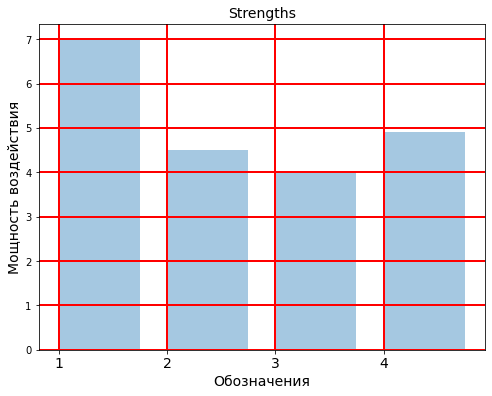

In [196]:
import matplotlib
import matplotlib.pyplot as plt

x_float = [1,2,3,4]
y = power_strengths
y_float = power_strengths                                                                                                                                 

x_pos=list()
for i in range(x_float.__len__()):
    x_pos.append(i)

fig=plt.figure(figsize=(8,6), dpi=72)
plt.bar(x_pos, y_float, width=0.75, align='edge', alpha=0.4)
plt.xticks(x_pos,  x_float, fontsize=14)
plt.xlabel('Обозначения', fontsize=14)
plt.ylabel('Мощность воздействия', fontsize=14)
plt.title('Strengths', fontsize=14)
plt.grid(True, color='r', linestyle='-', linewidth=2)

plt.show()

# Лист Weaknesses

In [209]:
print(table.worksheets())
try:
  worksheet = table.worksheet('Weaknesses')
except Exception as mistake:
    print('\n',mistake)
    print("Необходимо создать лист\n")
    worksheet = table.add_worksheet("Weaknesses",100,100)

print(dir(worksheet))
rows = worksheet.get_all_values()
power_weaknesses = list()
i=0
for row in rows:
  if(i>0):
    print (i, row)
    power_weaknesses.append(int(row[1])*float(row[2]))
  i+=1
cell_list = worksheet.range('D2:D5')
cell_values = power_weaknesses
for i, val in enumerate(cell_values):  
    cell_list[i].value = val   
worksheet.update_cells(cell_list)

[<Worksheet 'Strengths' id:0>, <Worksheet 'Weaknesses' id:1707558791>, <Worksheet 'Opportunities' id:764396106>, <Worksheet 'Threats' id:872234231>, <Worksheet 'Results' id:547076801>]
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_finder', '_properties', 'acell', 'add_cols', 'add_rows', 'append_row', 'cell', 'clear', 'client', 'col_count', 'col_values', 'delete_row', 'export', 'find', 'findall', 'get_all_records', 'get_all_values', 'id', 'insert_row', 'range', 'resize', 'row_count', 'row_values', 'spreadsheet', 'title', 'update_acell', 'update_cell', 'update_cells', 'update_title', 'updated']
1 ['Большие финансовые инвестиции', '8', '0.8', '6,4']
2 ['Большое количество конкурентов', '9', '0

{'spreadsheetId': '1rWI3nAXabk3o9GwqK5w1_dkf7Podbzc937XAKvpdlA4',
 'updatedCells': 4,
 'updatedColumns': 1,
 'updatedRange': 'Weaknesses!D2:D5',
 'updatedRows': 4}

# Столбчатая диаграмма Weaknesses

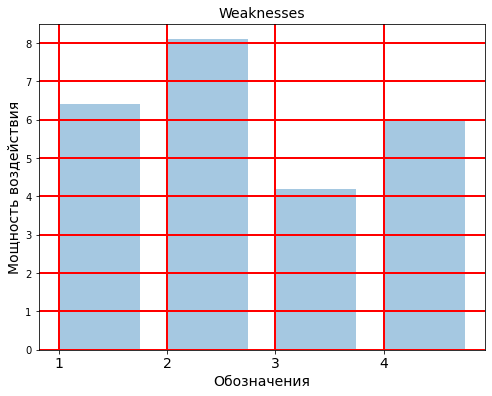

In [199]:
import matplotlib
import matplotlib.pyplot as plt

x_float = [1,2,3,4]
y = power_weaknesses
y_float = power_weaknesses                                                                                                                                 

x_pos=list()
for i in range(x_float.__len__()):
    x_pos.append(i)

fig=plt.figure(figsize=(8,6), dpi=72)
plt.bar(x_pos, y_float, width=0.75, align='edge', alpha=0.4)
plt.xticks(x_pos,  x_float, fontsize=14)
plt.xlabel('Обозначения', fontsize=14)
plt.ylabel('Мощность воздействия', fontsize=14)
plt.title('Weaknesses', fontsize=14)
plt.grid(True, color='r', linestyle='-', linewidth=2)

plt.show()

# Лист Opportunities

In [213]:
print(table.worksheets())
try:
  worksheet = table.worksheet('Opportunities')
except Exception as mistake:
    print('\n',mistake)
    print("Необходимо создать лист\n")
    worksheet = table.add_worksheet("Opportunities",100,100)

print(dir(worksheet))
rows = worksheet.get_all_values()
power_opportunities = list()
i=0
for row in rows:
  if(i>0):
    print (i, row)
    power_opportunities.append(int(row[1])*float(row[2]))
  i+=1
cell_list = worksheet.range('D2:D5')
cell_values = power_opportunities
for i, val in enumerate(cell_values):  
    cell_list[i].value = val   
worksheet.update_cells(cell_list)

[<Worksheet 'Strengths' id:0>, <Worksheet 'Weaknesses' id:1707558791>, <Worksheet 'Opportunities' id:764396106>, <Worksheet 'Threats' id:872234231>, <Worksheet 'Results' id:547076801>]
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_finder', '_properties', 'acell', 'add_cols', 'add_rows', 'append_row', 'cell', 'clear', 'client', 'col_count', 'col_values', 'delete_row', 'export', 'find', 'findall', 'get_all_records', 'get_all_values', 'id', 'insert_row', 'range', 'resize', 'row_count', 'row_values', 'spreadsheet', 'title', 'update_acell', 'update_cell', 'update_cells', 'update_title', 'updated']
1 ['Расширение спектра предоставляемых услуг', '8', '0.8', '6,4']
2 ['Привлечение постоянных клиент

{'spreadsheetId': '1rWI3nAXabk3o9GwqK5w1_dkf7Podbzc937XAKvpdlA4',
 'updatedCells': 4,
 'updatedColumns': 1,
 'updatedRange': 'Opportunities!D2:D5',
 'updatedRows': 4}

# Столбчатая диаграмма Opportunities

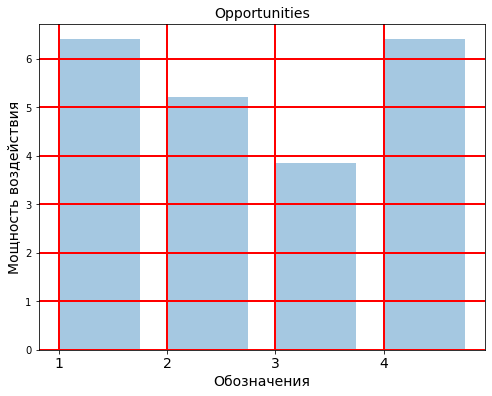

In [214]:
import matplotlib
import matplotlib.pyplot as plt

x_float = [1,2,3,4]
y = power_opportunities
y_float = power_opportunities                                                                                                                               

x_pos=list()
for i in range(x_float.__len__()):
    x_pos.append(i)

fig=plt.figure(figsize=(8,6), dpi=72)
plt.bar(x_pos, y_float, width=0.75, align='edge', alpha=0.4)
plt.xticks(x_pos,  x_float, fontsize=14)
plt.xlabel('Обозначения', fontsize=14)
plt.ylabel('Мощность воздействия', fontsize=14)
plt.title('Opportunities', fontsize=14)
plt.grid(True, color='r', linestyle='-', linewidth=2)

plt.show()

# Лист Threats

In [211]:
print(table.worksheets())
try:
  worksheet = table.worksheet('Threats')
except Exception as mistake:
    print('\n',mistake)
    print("Необходимо создать лист\n")
    worksheet = table.add_worksheet("Threats",100,100)

print(dir(worksheet))
rows = worksheet.get_all_values()
power_threats = list()
i=0
for row in rows:
  if(i>0):
    print (i, row)
    power_threats.append(int(row[1])*float(row[2]))
  i+=1
cell_list = worksheet.range('D2:D5')
cell_values = power_threats
for i, val in enumerate(cell_values):  
    cell_list[i].value = val   
worksheet.update_cells(cell_list)

[<Worksheet 'Strengths' id:0>, <Worksheet 'Weaknesses' id:1707558791>, <Worksheet 'Opportunities' id:764396106>, <Worksheet 'Threats' id:872234231>, <Worksheet 'Results' id:547076801>]
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_finder', '_properties', 'acell', 'add_cols', 'add_rows', 'append_row', 'cell', 'clear', 'client', 'col_count', 'col_values', 'delete_row', 'export', 'find', 'findall', 'get_all_records', 'get_all_values', 'id', 'insert_row', 'range', 'resize', 'row_count', 'row_values', 'spreadsheet', 'title', 'update_acell', 'update_cell', 'update_cells', 'update_title', 'updated']
1 ['Усиление конкуренции', '9', '0.8', '7,2']
2 ['Непонимание значимости ЗОЖ', '7', '0.8', '5,6']
3

{'spreadsheetId': '1rWI3nAXabk3o9GwqK5w1_dkf7Podbzc937XAKvpdlA4',
 'updatedCells': 4,
 'updatedColumns': 1,
 'updatedRange': 'Threats!D2:D5',
 'updatedRows': 4}

#Столбчатая диаграмма Threats

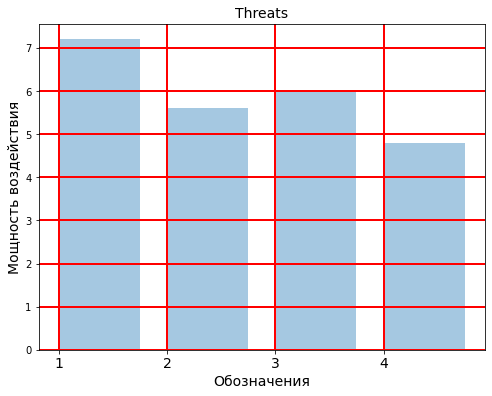

In [205]:
import matplotlib
import matplotlib.pyplot as plt

x_float = [1,2,3,4]
y = power_threats
y_float = power_threats                                                                                                                                

x_pos=list()
for i in range(x_float.__len__()):
    x_pos.append(i)

fig=plt.figure(figsize=(8,6), dpi=72)
plt.bar(x_pos, y_float, width=0.75, align='edge', alpha=0.4)
plt.xticks(x_pos,  x_float, fontsize=14)
plt.xlabel('Обозначения', fontsize=14)
plt.ylabel('Мощность воздействия', fontsize=14)
plt.title('Threats', fontsize=14)
plt.grid(True, color='r', linestyle='-', linewidth=2)

plt.show()

# Итоговая таблица SWOT-анализа

In [239]:
print(table.worksheets())
try:
  worksheet = table.worksheet('Results')
except Exception as mistake:
    print('\n',mistake)
    print("Необходимо создать лист\n")
    worksheet = table.add_worksheet("Results",100,100)

print(dir(worksheet))
rows = worksheet.get_all_values()
value = list()
power = [sum(power_strengths),sum(power_weaknesses),sum(power_opportunities),sum(power_threats)]
print (power)
i=0
for row in rows:
  if(i>=0):
    print (i, row)
  i+=1
cell_list = worksheet.range('B1:B5')
cell_values = power
for i, val in enumerate(cell_values):  
    cell_list[i].value = val   
worksheet.update_cells(cell_list)
results = sum(power_strengths)-sum(power_weaknesses)+sum(power_opportunities)-sum(power_threats)
worksheet.update_cell(5,2,results)

[<Worksheet 'Strengths' id:0>, <Worksheet 'Weaknesses' id:1707558791>, <Worksheet 'Opportunities' id:764396106>, <Worksheet 'Threats' id:872234231>, <Worksheet 'Results' id:547076801>]
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_finder', '_properties', 'acell', 'add_cols', 'add_rows', 'append_row', 'cell', 'clear', 'client', 'col_count', 'col_values', 'delete_row', 'export', 'find', 'findall', 'get_all_records', 'get_all_values', 'id', 'insert_row', 'range', 'resize', 'row_count', 'row_values', 'spreadsheet', 'title', 'update_acell', 'update_cell', 'update_cells', 'update_title', 'updated']
[20.4, 21.85, 21.85, 23.6]
0 ['Strengths', '20,4']
1 ['Weaknesses', '21,85']
2 ['Opportunities', '2

{'spreadsheetId': '1rWI3nAXabk3o9GwqK5w1_dkf7Podbzc937XAKvpdlA4',
 'updatedCells': 1,
 'updatedColumns': 1,
 'updatedRange': 'Results!B5',
 'updatedRows': 1}

#Столбчатая диаграмма SWOT

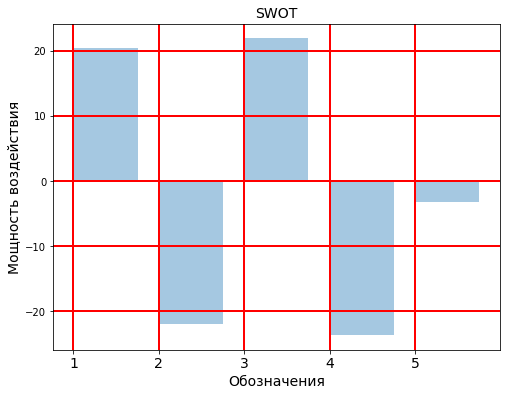

In [241]:
import matplotlib
import matplotlib.pyplot as plt

title = [ "strengths", "weaknesses", "opportunities", "threats", "result"]
x=title
x_float = [1, 2, 3, 4, 5]
y = power
y_float = [sum(power_strengths),-sum(power_weaknesses),sum(power_opportunities),-sum(power_threats),results]                                                                                                                              

x_pos=list()
for i in range(x_float.__len__()):
    x_pos.append(i)

fig=plt.figure(figsize=(8,6), dpi=72)
plt.bar(x_pos, y_float, width=0.75, align='edge', alpha=0.4)
plt.xticks(x_pos,  x_float, fontsize=14)
plt.xlabel('Обозначения', fontsize=14)
plt.ylabel('Мощность воздействия', fontsize=14)
plt.title('SWOT', fontsize=14)
plt.grid(True, color='r', linestyle='-', linewidth=2)

plt.show()